In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Definition & Working principle
Let's build model using **Linear regression**.

Linear regression is a **supervised learining** algorithm used when target / dependent variable  **continuous** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line.   It work on the principle of ordinary least square $(OLS)$ / Mean square errror $(MSE)$. In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction. 

## Hypothesis representation

We will use $\mathbf{x_i}$ to denote the independent variable and $\mathbf{y_i}$ to denote dependent variable. A pair of $\mathbf{(x_i,y_i)}$ is called training example. The subscripe $\mathbf{i}$ in the notation is simply index into the training set. We have $\mathbf{m}$ training example then $\mathbf{i = 1,2,3,...m}$.

The goal of supervised learning is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So hypothesis fuction represented as 

$$\mathbf{ h_\theta(x_{i}) = \theta_0 + \theta_1x_i }$$   
$\mathbf{\theta_0,\theta_1}$ are parameter of hypothesis.This is equation for **Simple / Univariate Linear regression**. 

In [2]:
df = pd.read_csv('Credit.csv')

## Dataset information

1. Income: Income of the customer.
2. Limit: Credit limit provided to the customer.
3. Rating: The customer's credit rating.
4. Cards: The number of credit cards the customer has.
5. Age: Age of the customer.
6. Education: Educational level of the customer.
7. Gender: Sex of the customer.
8. Student: If the customer is a student or not.
9. Married: If the customer is married.¶
10. Ethnicity: Ethnicity of the customer.
11. Balance: Credit balance of the customer.

In [3]:
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')


Number of rows and columns in the data set:  (400, 12)



In [4]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Now we have import dataset. When we look at the shape of dataset it has return as (1338,7).So there are $\mathbf{m=400}$ training exaple and $\mathbf{n=12}$ independent variable. The target variable here is Rating and remaining variables such as Income, Limit, Cards, Age Education, Gender, Student, Married, Ethnicity and Balance are independent variable. 

The hypothesis function for SLR looks like

$$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 Balance}$$

This is simple linear regression equation for given dataset

If $\mathbf{i=1}$ then 
$$\mathbf{h_\theta(x_{1}) = \theta_0+\theta_1 383}$$
$$\mathbf{y_1 = 283}$$
If $\mathbf{i=3}$ then 
$$\mathbf{h_\theta(x_{3}) = \theta_0+\theta_1 580}$$
$$\mathbf{y_3 = 514}$$

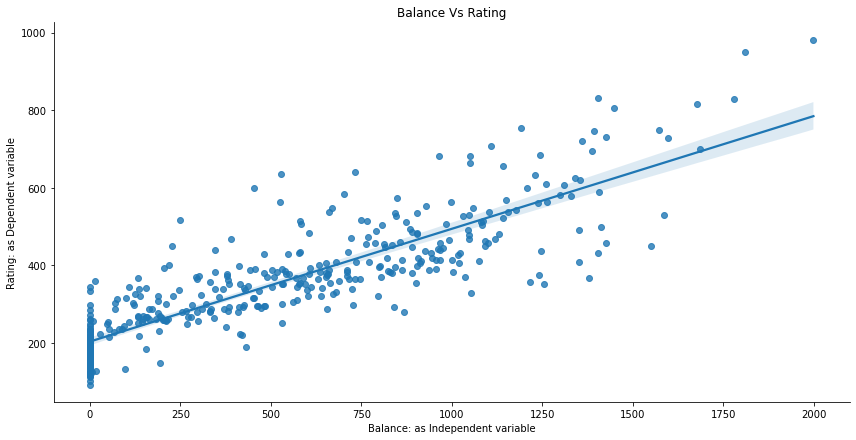

In [5]:
""" for our visualization purpose will fit line using seaborn library only for Balance as independent variable 
and Rating as dependent variable"""

sns.lmplot(x='Balance',y='Rating',data=df,aspect=2,height=6)
plt.xlabel('Balance: as Independent variable')
plt.ylabel('Rating: as Dependent variable')
plt.title('Balance Vs Rating');

## Cost function

  A cost function measures how much error in the model is in terms of ability to estimate the relationship between $x$ and $y$. 
  We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.
  
$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{J(\theta) =  \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2}$$

In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.ols('Rating~Balance', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):          1.90e-120
Time:                        20:04:02   Log-Likelihood:                -2309.8
No. Observations:                 400   AIC:                             4624.
Df Residuals:                     398   BIC:                             4632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    203.8036      5.900     34.545      0.000     192.205     215.402
Balance        0.2906      0.009     34.176      0.000       0.274       0.307
==============================================================================
Omnibus:                       26.531   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.435
Skew:                           0.474   Prob(JB):                     1.66e-09
Kurtosis:                       4.236   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
model.params

Intercept    203.803584
Balance        0.290639
dtype: float64

In [8]:
y_hat = model.params.Intercept + model.params.Balance*df['Balance']

## Model Validation
In order to validated model we need to check few assumption of linear regression model. The common assumption for *Linear Regression* model are following
1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be *linear*. This can be checked by scatter ploting Actual value Vs Predicted value
2. The residual error plot should be *normally* distributed.
3. The *mean* of *residual error* should be 0 or close to 0 as much as possible
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

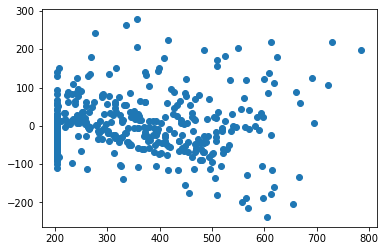

In [9]:
p = model.fittedvalues
res = model.resid
plt.scatter(p, res)

In [10]:
'{:f}'.format(np.mean(res))

'-0.000000'

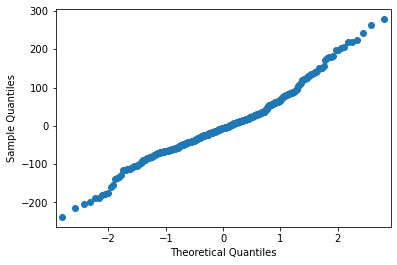

In [11]:
fig = sm.qqplot(model.resid)

## Hypothesis representation for MLR

For **Multiple Linear regression**, if more than one independent variable exist then we will use $\mathbf{x_{ij}}$ to denote indepedent variable and $\mathbf{y_{i}}$ to denote dependent variable. We have $\mathbf{n}$ independent variable then $\mathbf{j=1,2,3 ..... n}$. The hypothesis function represented as

$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$
$\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ are parameter of hypothesis,
$\mathbf{m}$ Number of training exaples,
$\mathbf{n}$ Number of independent variable,
$\mathbf{x_{ij}}$ is $\mathbf{i^{th}}$ training exaple of $\mathbf{j^{th}}$ feature.

The hypothesis function for MLR looks like

$$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 Income + \theta_2 Limit + \theta_3 Cards + \theta_4 Gender}$$

This multiple linear regression equation for given dataset.  
If $\mathbf{i=1}$ then 
$$\mathbf{h_\theta(x_{1}) = \theta_0+\theta_1 14.891 + \theta_2 3606 + \theta_3 2 + \theta_4 Male}$$ 
$$\mathbf{y_1 = 283}$$
If $\mathbf{i=3}$ then 
$$\mathbf{h_\theta(x_{3}) = \theta_0+\theta_1 104.593 + \theta_2 7075 + \theta_3 4 + \theta_4 Male}$$ 
$$\mathbf{y_3 = 514}$$

In [12]:
model_mlr = smf.ols('Rating ~ Income+Limit+Cards+Gender', df).fit()
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.258e+04
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:04:04   Log-Likelihood:                -1496.5
No. Observations:                 400   AIC:                             3003.
Df Residuals:                     395   BIC:                             3023.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           24.5074      1.711     14.324      0.000      21.144      27.871
Gender[T.Female]     0.1991      1.028      0.194      0.846      -1.821       2.220
Income               0.0343      0.024      1.436      0.152      -0.013       0.081
Limit                0.0664      0.000    181.801      0.000       0.066       0.067
Cards                4.8817      0.375     13.013      0.000       4.144       5.619
==============================================================================
Omnibus:                        7.541   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.229
Skew:                           0.220   Prob(JB):                       0.0444
Kurtosis:                       2.575   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

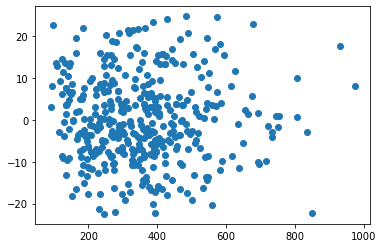

In [13]:
p_mlr = model_mlr.fittedvalues
res_mlr = model_mlr.resid
plt.scatter(p_mlr, res_mlr)

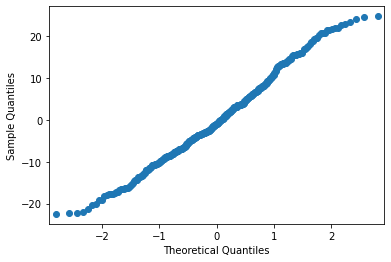

In [14]:
fig = sm.qqplot(model_mlr.resid)

In [15]:
'{:f}'.format(np.mean(res_mlr))

'0.000000'